# HTML vs XML

- Both HTML and XML are markup languages
  - HyperText Markup Language
    - Hypertext: text with links (hyperlinks) to other text
  - eXtensible Markup Language


Example from [W3](https://www.w3schools.com/html/tryit.asp?filename=tryhtml_basic_document)

<!DOCTYPE html>
<html>
<body>

<h1>My First Heading</h1>

<p>My first paragraph.</p>

</body>
</html>


- HTML contains a fixed set of tags (not eXtensible) (XML is a framework for defining markup languages whereas HTML is a markup language)
- HTML focusses on displaying instead of describing data (semantically less interesting)
- HTML allows small syntactic errors (XML is very unforgiving)


Most importantly, if you know XML, you are ready work with HTML

Today, practical advice on downloading, parsing and navigating HTML documents from the web.

# Accessing content with requests

In [17]:
import requests

In [18]:
url = 'https://ia800908.us.archive.org/6/items/alicesadventures19033gut/19033-h/19033-h.htm'

In [19]:
response = requests.get(url)

## Inspecting HTML

In [20]:
# response codes indicate i HTTP request was completed successfully
response

<Response [200]>

List of response codes is available [here](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status)

- HTML often more difficult to navigate and query then XML ("dirtier/complex")
    - Example of the [The Guardian](https://www.theguardian.com/uk)
- HTML not always syntactically well-formed (parsers needs to be more forgiven

Inspecting the HTML underlying ["Alice in Wonderland"](https://ia800908.us.archive.org/6/items/alicesadventures19033gut/19033-h/19033-h.htm).

In [22]:
response.content

b'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"\r\n    "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\r\n\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n  <head>\r\n    <meta http-equiv="Content-Type" content="text/html;charset=iso-8859-1" />\r\n    <title>\r\n      The Project Gutenberg eBook of Alice\'s Adventures in Wonderland, by Lewis Carroll\r\n    </title>\r\n    <style type="text/css">\r\n/*<![CDATA[  XML blockout */\r\n<!--\r\n    p {  margin-top: .75em;\r\n         text-align: justify;\r\n         margin-bottom: .75em;\r\n         }\r\n    h1,h2,h4,h5,h6 {\r\n         text-align: center; /* all headings centered */\r\n         clear: both;\r\n         }\r\n    h3  {text-decoration: underline; text-align: center; clear: both;}\r\n\r\n    hr { width: 33%;\r\n\t margin-top: 2em;\r\n\t margin-bottom: 2em;\r\n         margin-left: auto;\r\n         margin-right: auto;\r\n         clear: both;\r\n       }\r\n\r\n    body{margin-left: 10%;\r\n         margin-righ

In [24]:
type(response.content)

bytes

## Parsing HTML

In [25]:
from lxml import etree
from io import StringIO, BytesIO

In [28]:
# parsin HTML as an XML document often yields an error
tree = etree.parse(BytesIO(response.content))

XMLSyntaxError: Entity 'nbsp' not defined, line 140, column 179 (<string>, line 140)

In [29]:
# we can define a HTML parser
parser = etree.HTMLParser()

In [31]:
html_tree = etree.parse(BytesIO(response.content), parser)

In [32]:
html_tree

In [34]:
html_root = html_tree.getroot()

In [35]:
len(html_root)

2

In [36]:
for el in html_root: print(el.tag)

head
body


In [39]:
print(etree.tostring(el[0],method='text',encoding='unicode'))



The Project Gutenberg EBook of Alice in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice in Wonderland

Author: Lewis Carroll

Illustrator: Gordon Robinson

Release Date: August 12, 2006 [EBook #19033]

Language: English

Character set encoding: ISO-8859-1

*** START OF THIS PROJECT GUTENBERG EBOOK ALICE IN WONDERLAND ***




Produced by Jason Isbell, Irma Spehar, and the Online
Distributed Proofreading Team at http://www.pgdp.net












## Navigating HTML tags

[Popular HTML tags](http://www.columbia.edu/~sss31/html/html-tags.html).

In [66]:
headings = html_root[1].xpath('.//h2'); len(headings)

10

In [71]:
for heading in headings: print(etree.tostring(heading,method='text',encoding='unicode'))

I—DOWN THE RABBIT-HOLE



II—THE POOL OF TEARS



III—A CAUCUS-RACE AND A LONG TALE



IV—THE RABBIT SENDS IN A LITTLE BILL



V—ADVICE FROM A CATERPILLAR



VI—PIG AND PEPPER



VII—A MAD TEA-PARTY



VIII—THE QUEEN'S CROQUET GROUND



IX—WHO STOLE THE TARTS?



X—ALICE'S EVIDENCE





### Mining links

In [41]:
links = html_root[1].xpath('.//a'); len(links)

86

In [54]:
# links to images
links[1].attrib

{'href': 'images/cover.jpg'}

In [52]:
# links to other parts of the document
links[10].attrib

{'name': 'Page_5', 'id': 'Page_5'}

In [53]:
# anchor text
links[10].text

'[Pg 5]'

In [58]:
hrefs = html_root[1].xpath('.//a/@href'); len(hrefs)

27

In [59]:
hrefs

['images/cover.jpg',
 'images/plate01.jpg',
 'images/i001.jpg',
 'images/i002.jpg',
 'images/i003.jpg',
 'images/i004.jpg',
 'images/i005.jpg',
 'images/i006.jpg',
 'images/plate02.jpg',
 'images/i007.jpg',
 'images/i008.jpg',
 'images/i009.jpg',
 'images/i010.jpg',
 'images/i011.jpg',
 'images/i012.jpg',
 'images/plate03.jpg',
 'images/i013.jpg',
 'images/i014.jpg',
 'images/i015.jpg',
 'images/i016.jpg',
 'images/i017.jpg',
 'images/plate04.jpg',
 'images/i018.jpg',
 'images/i019.jpg',
 'images/i020.jpg',
 'images/i021.jpg',
 'images/i022.jpg']

## Handling images

In [63]:
base_url = 'https://ia800908.us.archive.org/6/items/alicesadventures19033gut/19033-h'
base_url + '/' + hrefs[0]

'https://ia800908.us.archive.org/6/items/alicesadventures19033gut/19033-h/images/cover.jpg'

In [72]:
img = requests.get(base_url + '/' + hrefs[0])

In [75]:
img.content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00d\x00d\x00\x00\xff\xec\x00\x11Ducky\x00\x01\x00\x04\x00\x00\x00\x1e\x00\x00\xff\xee\x00\x0eAdobe\x00d\xc0\x00\x00\x00\x01\xff\xdb\x00\x84\x00\x10\x0b\x0b\x0b\x0c\x0b\x10\x0c\x0c\x10\x17\x0f\r\x0f\x17\x1b\x14\x10\x10\x14\x1b\x1f\x17\x17\x17\x17\x17\x1f\x1e\x17\x1a\x1a\x1a\x1a\x17\x1e\x1e#%\'%#\x1e//33//@@@@@@@@@@@@@@@\x01\x11\x0f\x0f\x11\x13\x11\x15\x12\x12\x15\x14\x11\x14\x11\x14\x1a\x14\x16\x16\x14\x1a&\x1a\x1a\x1c\x1a\x1a&0#\x1e\x1e\x1e\x1e#0+.\'\'\'.+550055@@?@@@@@@@@@@@@\xff\xc0\x00\x11\x08\x04P\x03 \x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\xaf\x00\x00\x01\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x10\x00\x01\x03\x03\x03\x02\x03\x04\x06\x07\x05\x07\x05\x00\x00\x07\x01\x00\x02\x03\x11!\x041\x12\x05AQa"\x13q\x812\x06\x91\xa1\xb1B#\x14\xc1\xd1Rbr3\x15\xf0\xe1\x82\x92$\xf1\xb2CS45\x16\xa2c

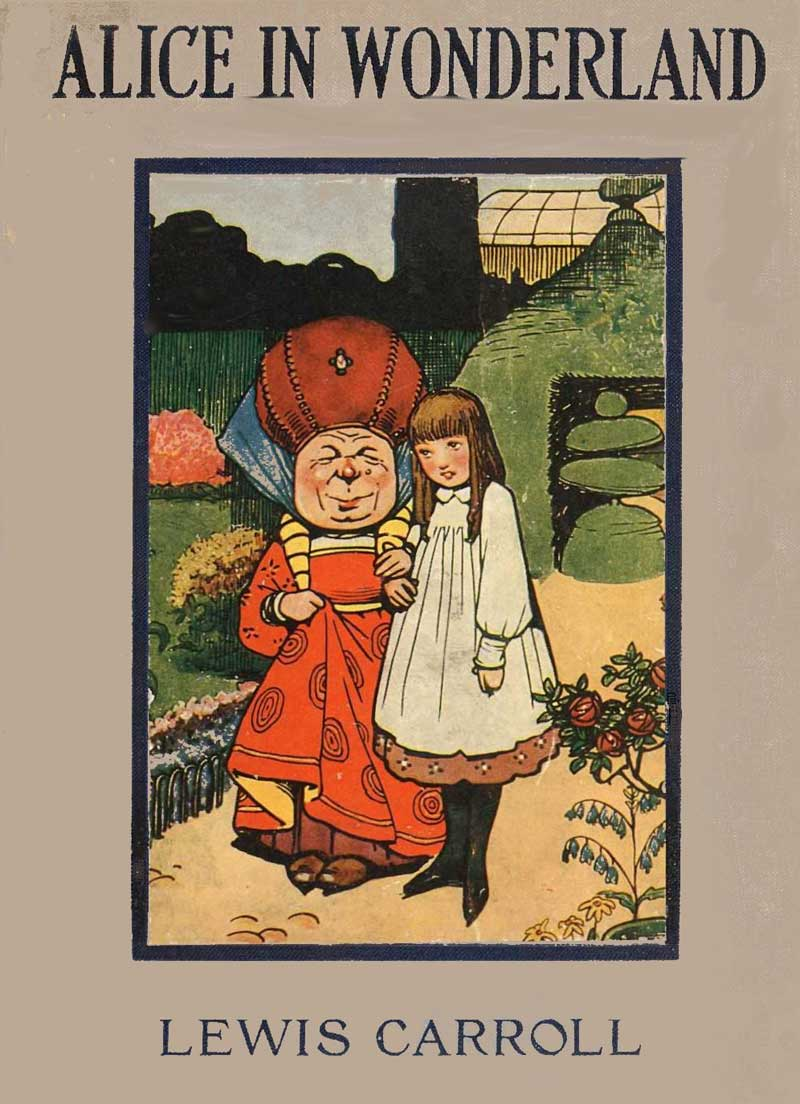

In [76]:
from IPython.display import Image
Image(img.content)

In [80]:
with open('../../cover.jpg','wb') as handler:
    handler.write(img.content)

## ✏️ Open Exercise: Comparing Online Newspapers

- Build a program that retrieves anchor text from the landing of page of the Guardian (and another paper, which you are free to choose)
- For each newspaper, collect all anchor text in one variable (or document)
- Compute word frequencies for each newspaper

In [ ]:
# enter your code here

# Fin.